# Business Intelligence Fall 2023 Exam Project

This project is designed as experimental research and development of BI implementation solution. It involves systematic and creative work of finding novel, uncertain, and reproducible results by applying modern BI and artificial intelligence (AI) technologies in a context. 

The development workflow goes through four stages and milestones, each of which has an objective, tasks,
and deliverables.

## Stage 1: Problem Definition
### Objective: Foundation of a business case and problem statement

https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023/data

1. At this stage you brainstorm, browse sources of inspiration and information, collect ideas and discuss business or social domains, where BI and AI can bring a value.
2. Choose one of your ideas and define context, purpose, research questions, and hypotheses for a BI problem statement. Write a brief annotation of your project, in about four sentences, explaining:
     - which challenge you would like to address?
     - why is it important or interesting research goal?
     - what is the expected solution your project would provide?
     - what would be the impact of the solution and which category of users could benefit from it?
3. Prepare the development environment
     - give a title to your project
     - plan and organise the execution of the individual tasks in terms of time, milestones, deliverables, team members engagement
     - prepare the development platform and procedures – Github repository, IDE, software tools
4. Create and upload the initial project document with the information from above in a .md file in your repository as an initial release of the project. 

## Stage 2: Data Preparation


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

### Objective: Data collection, exploration and pre-processing
Based on the ideas and assumptions defined at the previous stage:
1. Collect and load relevant data from various sources
2. Clean and integrate the collected data in appropriate data structures. Apply any transformations needed for the integration and the operations - ETL (Extract Transform Load) or ELT (Extract Load Transform).
3. Explore the data by applying measures from statistics to discover its basic features. Create charts and diagrams to visualize the features for better understanding and support of further decisions.
4. Apply the necessary pre-processing to prepare the data for machine learning analysis, ensuring that the data is:
    - Meaningful – describes relevant and correctly measured features and observations.
    - Sufficient – describes various cases and feature occurrences, decided by testing.
    - Shaped – presented in a structure, appropriate for processing by machine learning algorithms.
    - Cleaned – repaired from missing values and outliners.
    - Scaled – transform data distributions in comparable scales, when necessary.
    - Engineered – analyse all features and select the most informative for further processing.
    
Export your initial version of the solution to the Github repository.

In [2]:
#Dresen Links:
#df_travel= pd.read_csv('../../../../OneDrive/Dokumenter/GitHub/github-bi/BI-Fall-2023-Exam-Project/Data/traveldistmin.csv')
#df_infl= pd.read_csv('../../../../OneDrive/Dokumenter/GitHub/github-bi/BI-Fall-2023-Exam-Project/Data/US_inflation_rates.csv')
#df_remoteWork = pd.read_excel('../../../../OneDrive/Dokumenter/GitHub/github-bi/BI-Fall-2023-Exam-Project/Data/statistic_id1356325_us-workers-working-hybrid-or-remote-vs-on-site-2019-q4-2022.xlsx', sheet_name='Data')
#df_happiness = pd.read_excel('../../../../OneDrive/Dokumenter/GitHub/github-bi/BI-Fall-2023-Exam-Project/Data/statistic_id1111316_struggles-with-working-remotely-2020-2022.xlsx', sheet_name='Data')
#df = pd.read_csv('../../../../OneDrive/Dokumenter/GitHub/github-bi/BI-Fall-2023-Exam-Project/Data/ds_salaries2.csv')

In [3]:
#df_travel= pd.read_csv('../../../Documents/GitHub/BI-Fall-2023-Exam-Project/Data/traveldistmin.csv')
#df_infl= pd.read_csv('../../../Documents/GitHub/BI-Fall-2023-Exam-Project/Data/US_inflation_rates.csv')
#df_remoteWork = pd.read_excel('../../../Documents/GitHub/BI-Fall-2023-Exam-Project/Data/statistic_id1356325_us-workers-working-hybrid-or-remote-vs-on-site-2019-q4-2022.xlsx', sheet_name='Data')
#df_happiness = pd.read_excel('../../../Documents/GitHub/BI-Fall-2023-Exam-Project/Data/statistic_id1111316_struggles-with-working-remotely-2020-2022.xlsx', sheet_name='Data')
#df_sal = pd.read_csv('../../../Documents/GitHub/BI-Fall-2023-Exam-Project/Data/ds_salaries2.csv')

## Cleaning Inflation Data

In [4]:
df_inflation= pd.read_csv('../../../Documents/GitHub/BI-Fall-2023-Exam-Project/Data/US_inflation_rates.csv')
#df_inflation = pd.read_csv('../../../../../OneDrive/Dokumenter/GitHub/github-bi/BI-Fall-2023-Exam-Project/Data/US_inflation_rates.csv')
df_inflation

,date,value
0,1947-01-01,21.480
1,1947-02-01,21.620
2,1947-03-01,22.000
3,1947-04-01,22.000
4,1947-05-01,21.950
...,...,...
913,2023-02-01,301.648
914,2023-03-01,301.808
915,2023-04-01,302.918
916,2023-05-01,303.294


In [5]:
df_inflation.shape

(918, 2)

In [6]:
df_inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    918 non-null    object 
 1   value   918 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.5+ KB


In [7]:
df_inflation.isnull().sum()

date     0
value    0
dtype: int64

In [8]:
df_inflation.describe()

,value
count,918.000000
mean,117.794828
std,83.736360
min,21.480000
25%,32.105000
50%,106.900000
75%,188.000000
max,303.841000


In [9]:
# Convert the 'date' column to datetime if it's not already
df_inflation['date'] = pd.to_datetime(df_inflation['date'])

# Extract the year from the 'date' column
df_inflation['year'] = df_inflation['date'].dt.year

In [10]:
# Filter the DataFrame to select years from 1947 to 2023
year_df_inflation = df_inflation[(df_inflation['year'] >= 1947) & (df_inflation['year'] <= 2023)]

In [11]:
# Get the index values of the selected years
index_year_df_inflation = year_df_inflation.index
index_year_df_inflation

RangeIndex(start=0, stop=918, step=1)

In [12]:
# Select columns for X and y based on the data you've shown
X_df_inflation = np.array(index_year_df_inflation).reshape(-1, 1)
y_df_inflation = df_inflation['value'].values.reshape(-1, 1)

In [13]:
df_inflation.sample(5)

,date,value,year
861,2018-10-01,252.772,2018
472,1986-05-01,109.000,1986
164,1960-09-01,29.610,1960
298,1971-11-01,41.000,1971
523,1990-08-01,131.600,1990


In [14]:
y_df_inflation[461]

array([107.5])

/var/folders/fb/v36gky9d75v_pjvxsmb7jzfw0000gn/T/ipykernel_23960/3676746267.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_inflation['value'], label='value', norm_hist=True)


<Axes: xlabel='value', ylabel='Density'>

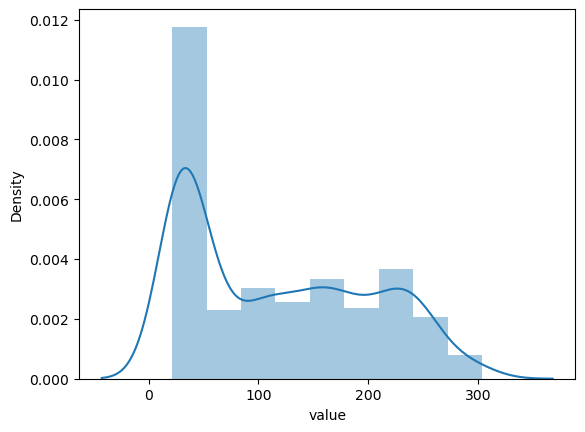

In [15]:
# Create a histogram of the years
sns.distplot(df_inflation['value'], label='value', norm_hist=True)

# Salary exploration and cleaning

In [16]:
#A-Path
#df_salary_ini = pd.read_csv('../../../../../OneDrive/Dokumenter/GitHub/github-bi/BI-Fall-2023-Exam-Project/Data/ds_salaries2.csv')

In [17]:
df_salary_ini = pd.read_csv('../../../Documents/GitHub/BI-Fall-2023-Exam-Project/Data/ds_salaries2.csv')

In [18]:
def clean_and_extract_data(df):
    # Initialize empty arrays for storing the matching rows
    work_year_values = []
    job_title_values = []
    employee_residence_values = []
    employment_type_values = []
    salary_in_usd_values = []
    experience_level_values = []
    remote_ratio_values = []

    # Criteria for filtering the data
    for index, row in df.iterrows():
        employee_residence = row['employee_residence']
        employment_type = row['employment_type']
        job_title = row['job_title']
        experience_level = row['experience_level']

        if (
            employee_residence == 'US' and
            employment_type == 'FT' and
            job_title in ['Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning Engineer'] and
            experience_level in ['EN', 'MI', 'SE', 'EX']
        ):
            # Save the values from the matching rows into arrays
            work_year_values.append(row['work_year'])
            job_title_values.append(job_title)
            employee_residence_values.append(employee_residence)
            employment_type_values.append(employment_type)
            salary_in_usd_values.append(row['salary_in_usd'])
            experience_level_values.append(experience_level)
            remote_ratio_values.append(row['remote_ratio'])

    # Create a DataFrame from the matching data
    data = {
        'work_year': work_year_values,
        'job_title': job_title_values,
        'employee_residence': employee_residence_values,
        'employment_type': employment_type_values,
        'salary_in_usd': salary_in_usd_values,
        'experience_level': experience_level_values,
        'remote_ratio': remote_ratio_values
    }
    matching_df = pd.DataFrame(data)

    return matching_df




In [19]:
df_sal = clean_and_extract_data(df_salary_ini)


In [20]:
data_analyst_count = df_sal['job_title'].value_counts()['Data Analyst']
print("Number of 'Data Analyst' jobs:", data_analyst_count)

Number of 'Data Analyst' jobs: 517


In [21]:
data_engineer_count = df_sal['job_title'].value_counts()['Data Engineer']
print("Number of 'Data Engineer' jobs:", data_engineer_count)

Number of 'Data Engineer' jobs: 903


In [22]:
data_scientist_count = df_sal['job_title'].value_counts()['Data Scientist']
print("Number of 'Data Scientist' jobs:", data_scientist_count)

Number of 'Data Scientist' jobs: 667


In [23]:
machine_learning_engineer_count = df_sal['job_title'].value_counts()['Machine Learning Engineer']
print("Number of 'Machine Learning Engineer' jobs:", machine_learning_engineer_count)

Number of 'Machine Learning Engineer' jobs: 218


In [24]:
# Assuming 'sal_df' is your DataFrame
column_data_types = df_sal.dtypes

# Display the data types of each column
print(column_data_types)

work_year              int64
job_title             object
employee_residence    object
employment_type       object
salary_in_usd          int64
experience_level      object
remote_ratio           int64
dtype: object


## Remote vs On-site vs Hybrid working from salary data

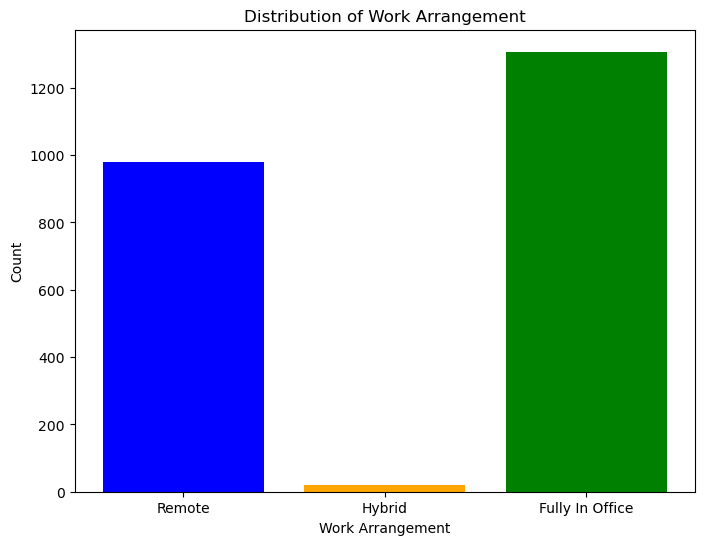

In [25]:
# Create a simple bar chart
plt.figure(figsize=(8, 6))

# Extract the values for each category
remote = df_sal[df_sal['remote_ratio'] == 100]['remote_ratio'].count()
hybrid = df_sal[df_sal['remote_ratio'] == 50]['remote_ratio'].count()
office = df_sal[df_sal['remote_ratio'] == 0]['remote_ratio'].count()

categories = ['Remote', 'Hybrid', 'Fully In Office']
values = [remote, hybrid, office]

# Create the bar chart
plt.bar(categories, values, color=['blue', 'orange', 'green'])

# Add labels and title
plt.xlabel('Work Arrangement')
plt.ylabel('Count')
plt.title('Distribution of Work Arrangement')

# Show the plot
plt.show()

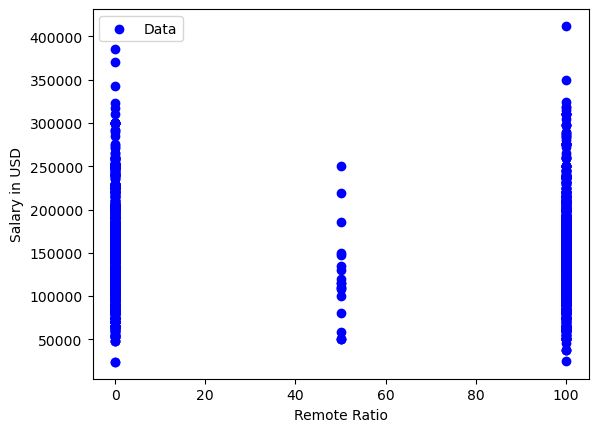

Slope (Coefficient): 8.896394467966209
Intercept: 148600.2531049204


In [26]:
# Assuming 'sal_df' is your DataFrame
# We'll use 'salary_in_usd' for the dependent variable (y) and 'remote_ratio' for the independent variable (x)
X = df_sal['remote_ratio'].values.reshape(-1, 1)
y = df_sal['salary_in_usd'].values

model = LinearRegression()
model.fit(X, y)

# Predictions for the entire range of remote_ratio values
y_pred = model.predict(X)

# Create a scatter plot of the data points
plt.scatter(X, y, color='blue', label='Data')

# Create a line plot for the regression line
#plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')

# Add labels and a legend
plt.xlabel('Remote Ratio')
plt.ylabel('Salary in USD')
plt.legend()

# Show the plot
plt.show()

slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope (Coefficient): {slope}")
print(f"Intercept: {intercept}")

In [27]:
# Group the data by 'remote_ratio' and calculate the mean salary for each group
average_salaries = df_sal.groupby('remote_ratio')['salary_in_usd'].mean()

# Reset the index to make 'remote_ratio' a column
average_salaries = average_salaries.reset_index()

# Rename the 'salary_in_usd' column to 'average_salary'
average_salaries = average_salaries.rename(columns={'salary_in_usd': 'average_salary'})

# Replace 'remote_ratio' values with descriptive labels
average_salaries['remote_ratio'] = average_salaries['remote_ratio'].replace({0: 'Fully In Office', 50: 'Hybrid', 100: 'Remote'})

# Print the average salaries
print(average_salaries)


      remote_ratio  average_salary
0  Fully In Office   148810.603673
1           Hybrid   120105.263158
2           Remote   149770.718080


# Remote vs on-site vs Hybrid generally in US

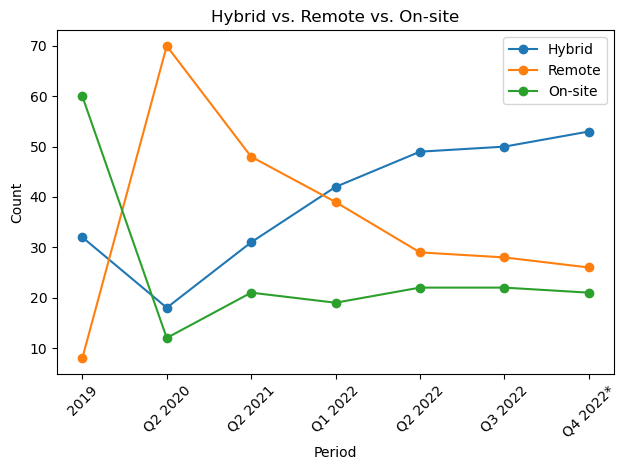

In [28]:
#A
#df_remoteWork = pd.read_excel('../../../../../OneDrive/Dokumenter/GitHub/github-bi/BI-Fall-2023-Exam-Project/Data/statistic_id1356325_us-workers-working-hybrid-or-remote-vs-on-site-2019-q4-2022.xlsx', sheet_name='Data')

df_remoteWork = pd.read_excel('../../../Documents/GitHub/BI-Fall-2023-Exam-Project/Data/statistic_id1356325_us-workers-working-hybrid-or-remote-vs-on-site-2019-q4-2022.xlsx', sheet_name='Data')


# Create a figure and axis
fig, ax = plt.subplots()

# Plot the lines using the DataFrame columns
ax.plot(df_remoteWork['Period'], df_remoteWork['Hybrid'], label='Hybrid', marker='o')
ax.plot(df_remoteWork['Period'], df_remoteWork['Remote'], label='Remote', marker='o')
ax.plot(df_remoteWork['Period'], df_remoteWork['On-site'], label='On-site', marker='o')

# Add labels and title
ax.set_xlabel('Period')
ax.set_ylabel('Count')
ax.set_title('Hybrid vs. Remote vs. On-site')

# Add a legend
ax.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average fuel cost for average american

## Average travel time and distance for communing, daily

In [29]:
#A
#df_travel= pd.read_csv('../../../../../OneDrive/Dokumenter/GitHub/github-bi/BI-Fall-2023-Exam-Project/Data/traveldistmin.csv')

#E, J
df_travel= pd.read_csv('../../../Documents/GitHub/BI-Fall-2023-Exam-Project/Data/traveldistmin.csv')
df_travel=df_travel.drop(['Unnamed: 0'], axis=1)
df_travel.head()


,TRVLCMIN,TRPMILES
0,15,5.244
1,20,5.149
2,120,84.004
3,150,81.628
4,15,2.250


In [30]:
df_travel.describe()

,TRVLCMIN,TRPMILES
count,923572.000000,923572.000000
mean,21.557486,11.436043
std,32.884552,74.559992
min,-9.000000,-9.000000
25%,8.000000,1.335000
50%,15.000000,3.443000
75%,25.000000,8.743000
max,1200.000000,9621.053000


The extreme values should be taken into account in this  analysis.

For example, high extreme values would be an indicator of remote working being a positive.

Negative values doesnt make any sense.

In the scatterplot below you can see there's some really odd values.

A travel time close to 0 with more than 1000 miles traveled is impossible.

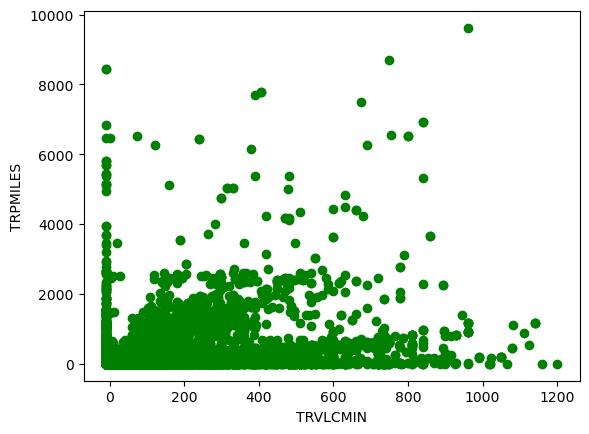

In [31]:
plt.xlabel('TRVLCMIN')
plt.ylabel('TRPMILES')
plt.scatter(df_travel.TRVLCMIN, df_travel.TRPMILES, color='green')

We made our own breakpoint for when we find the data valuable, which is as long as the miles and minutes are within the 8 times of each other, and removed all of the rows with 0-values.

Drop rows with 0 values in 'TRPMILES' or 'TRVLCMIN'

In [32]:
df_travel = df_travel[(df_travel['TRPMILES'] != 0) & (df_travel['TRVLCMIN'] != 0)]

Drop rows where one value is 8 times greater than the other in the same row

In [33]:
df_travel = df_travel[~((df_travel['TRPMILES'] >= 8 * df_travel['TRVLCMIN']) | (df_travel['TRVLCMIN'] >= 8 * df_travel['TRPMILES']))]

print("Updated DataFrame:")
print(df_travel)

Updated DataFrame:
        TRVLCMIN  TRPMILES
0             15     5.244
1             20     5.149
2            120    84.004
3            150    81.628
4             15     2.250
...          ...       ...
923560        12     4.778
923561        26     9.115
923564        29     9.562
923565        26     9.115
923566        29     9.562

[737646 rows x 2 columns]


In [34]:
count_of_zeros_miles = np.count_nonzero(df_travel.TRPMILES == 0)
print(count_of_zeros_miles)

0


In [35]:
count_of_zeros_mins = np.count_nonzero(df_travel.TRVLCMIN == 0)
print(count_of_zeros_mins)

0


As seen below this data looks much more reasonable

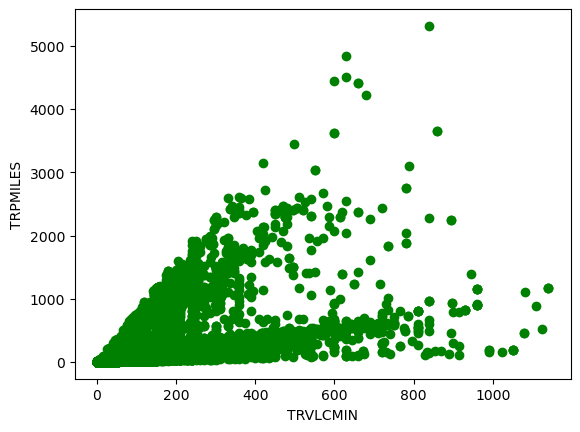

In [36]:
plt.xlabel('TRVLCMIN')
plt.ylabel('TRPMILES')
plt.scatter(df_travel.TRVLCMIN, df_travel.TRPMILES, color='green')

In [37]:
df_travel.describe()

,TRVLCMIN,TRPMILES
count,737646.000000,737646.000000
mean,22.405099,12.677658
std,32.473744,54.363180
min,1.000000,0.126000
25%,10.000000,2.276000
50%,15.000000,4.774000
75%,25.000000,10.839000
max,1140.000000,5315.834000


## Average miles per gallon (MPG) for modern cars

Now we can (roughly) tell that the average travel time is 22,4 minutes and average travel distance is 12,7 miles

In [38]:
#pip install Pillow
from PIL import Image

In [39]:
#On the following image we can tell the average MPG (miles pr gallon) is 20-30 in 2021
#Considering evolution in the field of car production, it's not unreasonable to set mpg to 30 in 2023 and a few years going forward
image = Image.open('../../../Documents/GitHub/BI-Fall-2023-Exam-Project/Data/MPG_avg_us_2021.png')
image.show()

## Historical data of price in dollars per gallon in US

In [40]:
#A
#df_gas = pd.read_excel('../../../../../OneDrive/Dokumenter/GitHub/github-bi/BI-Fall-2023-Exam-Project/Data/statistic_id204740_annual-gas-prices-in-the-united-states-1990-2022.xlsx', sheet_name='Data')

#E, J
df_gas = pd.read_excel('../../../Documents/GitHub/BI-Fall-2023-Exam-Project/Data/statistic_id204740_annual-gas-prices-in-the-united-states-1990-2022.xlsx', sheet_name='Data')
df_gas.describe()

,Year,Dollarprice
count,33.00000,33.000000
mean,2006.00000,2.134848
std,9.66954,0.914191
min,1990.00000,1.030000
25%,1998.00000,1.200000
50%,2006.00000,2.170000
75%,2014.00000,2.780000
max,2022.00000,3.950000


In [41]:
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         33 non-null     int64  
 1   Dollarprice  33 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 660.0 bytes


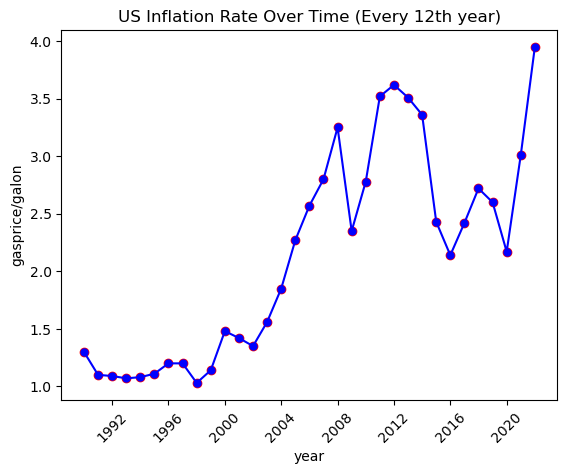

In [42]:
plt.xlabel('year')
plt.ylabel('gasprice/galon')
plt.scatter(df_gas.Year, df_gas.Dollarprice, color='red')
plt.title('US Inflation Rate Over Time (Every 12th year)')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.plot(df_gas.Year, df_gas.Dollarprice, color='blue', linestyle='-', marker='o', markersize=5)

plt.show()


## Stage 3: Solution Prototype
### Objective: Using data and analysis for building predictive models
Extend the data analysis by implementing machine learning and deep learning methods and algorithms.
1. Select relevant methods that could solve the problem. Train, test and validate data models by use of
supervised and unsupervised methods, neural networks or graphs.
2. Select and apply appropriate measures for assessing the quality of your models. Iterate the process to
explore possibilities for improvement the quality of the models.

Publish the new version of your solution in Github as a prototype.

## Putting salaries together

In [43]:
def train_regression_models(df, job_titles, experience_levels):
    models = {}  # To store trained models

    for job_title_to_match in job_titles:
        models[job_title_to_match] = {}  # Create a sub-dictionary for each job title

        for experience_level in experience_levels:
            if job_title_to_match == "Machine Learning Engineer" and experience_level == "EX":
                # Skip this specific combination
                continue

            work_year_values = []
            salary_in_usd_values = []

            for index, row in df.iterrows():
                job_title = row['job_title']
                employment_type = row['employment_type']
                employee_residence = row['employee_residence']
                current_experience_level = row['experience_level']

                # Checking for matching values
                if (
                    job_title == job_title_to_match
                    and employment_type == 'FT'
                    and employee_residence == 'US'
                    and current_experience_level == experience_level
                ):
                    work_year_values.append(row['work_year'])
                    salary_in_usd_values.append(row['salary_in_usd'])

            # Check if there are enough data points to perform train-test split
            if len(work_year_values) < 2:
                print(f"Insufficient data for {job_title_to_match} and {experience_level}. Skipping.")
                continue

            x = pd.DataFrame(work_year_values, columns=['work_year'])
            y = pd.Series(salary_in_usd_values)

            # Split the data into training and testing sets
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

            model = LinearRegression()
            model.fit(x_train, y_train)

            # Store the model in the sub-dictionary with a key based on experience level
            models[job_title_to_match][experience_level] = model

    return models




In [101]:
def plot_regression_results(models, job_titles, experience_levels):
    # Define colors for different experience levels
    colors = ['blue', 'green', 'red', 'purple']

    for job_title_to_match in job_titles:
        plt.figure(figsize=(8, 6))  # Create a separate figure for each job title

        for experience_level in experience_levels:
            if job_title_to_match == "Machine Learning Engineer" and experience_level == "EX":
                # Skip this specific combination
                continue

            model = models[job_title_to_match][experience_level]

            # Predict future results
            x_future = np.arange(2020, 2031).reshape(-1, 1)  # Extend the x-axis to 2030
            y_future = model.predict(x_future)

            # Plot the linear regression line for future predictions
            plt.plot(x_future, y_future, color=colors[experience_levels.index(experience_level)], label=f'{experience_level} - {job_title_to_match} - Future Prediction')

        # Customize the plot for the specific job title
        plt.xlabel('Work Year')
        plt.ylabel('Salary in USD')
        plt.title(f'Linear Regression for {job_title_to_match}')
        plt.grid(True)
        plt.xlim(2020, 2030)  # Set the x-axis limits from 2020 to 2030
        plt.legend()
        plt.show()


In [102]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning Engineer']
experience_levels = ['EN', 'MI', 'SE', 'EX']

In [103]:
trained_models = train_regression_models(df_sal, job_titles, experience_levels)


/Users/emiliocastrolagunas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/emiliocastrolagunas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/emiliocastrolagunas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/emiliocastrolagunas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


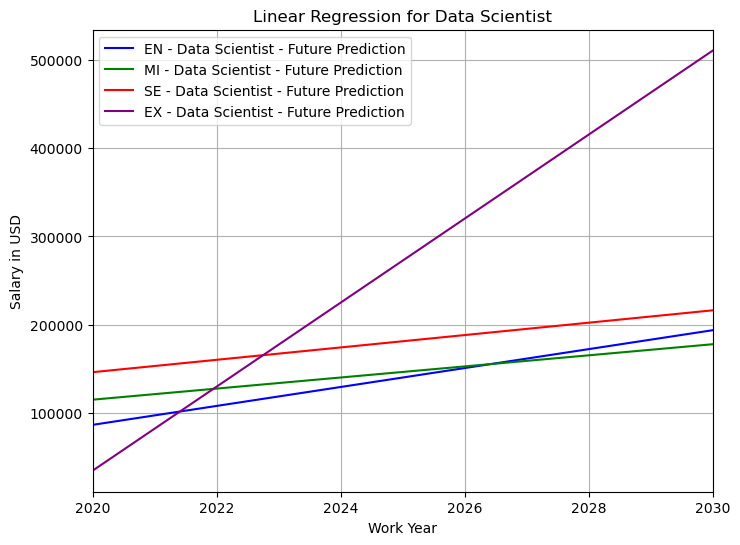

/Users/emiliocastrolagunas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/emiliocastrolagunas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/emiliocastrolagunas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/emiliocastrolagunas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


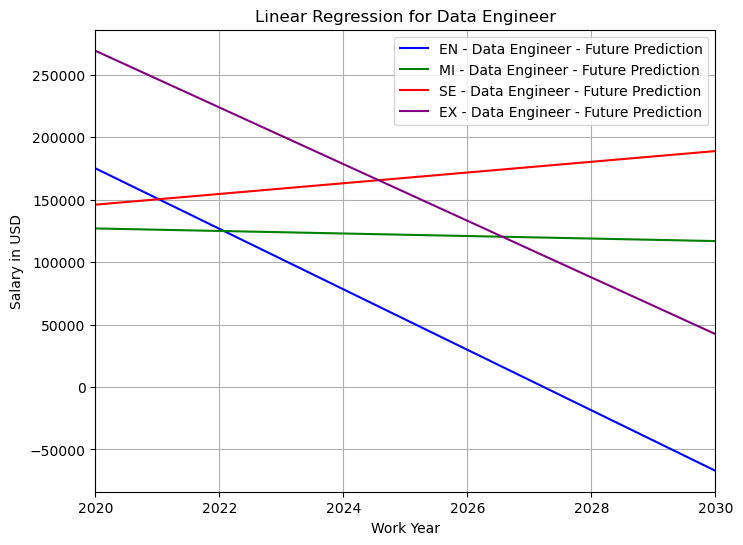

/Users/emiliocastrolagunas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/emiliocastrolagunas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/emiliocastrolagunas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/emiliocastrolagunas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


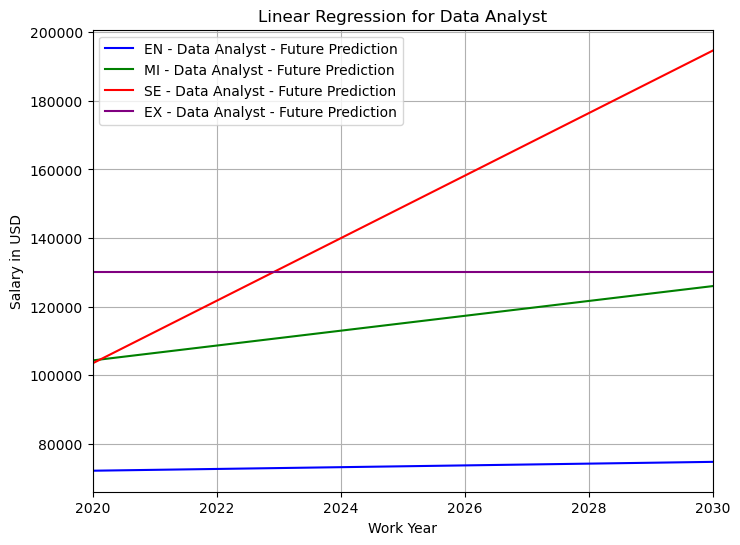

/Users/emiliocastrolagunas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/emiliocastrolagunas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/emiliocastrolagunas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


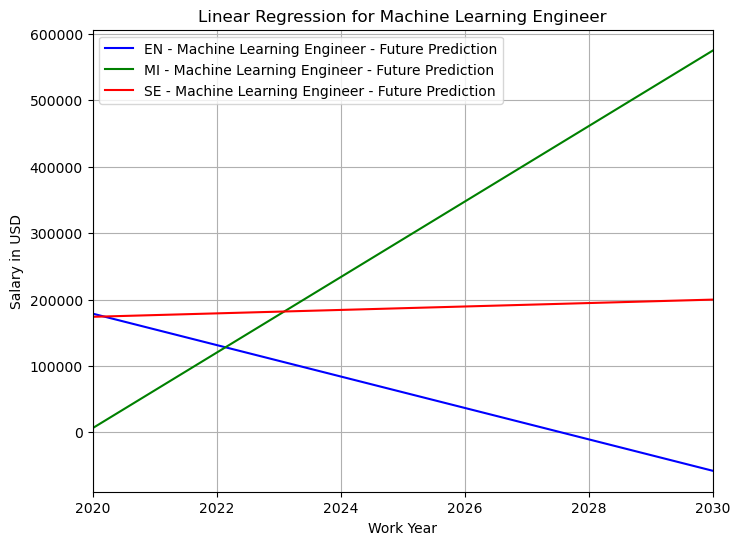

In [104]:
plot_regression_results(trained_models, job_titles, experience_levels)


In [105]:
#trained_models = train_regression_models(df_sal, job_titles, experience_levels)

In [106]:
def predict_salaries_for_all_combinations(trained_models, job_titles, experience_levels, work_year_to_predict):
    predictions = {}  # To store predictions

    for job_title in job_titles:
        predictions[job_title] = {}  # Create a sub-dictionary for each job title

        for experience_level in experience_levels:
            model = trained_models.get(job_title, {}).get(experience_level)

            if model is not None:
                predicted_salary = model.predict([[work_year_to_predict]])[0]
                # Calculate the percentage difference from the salary in 2023
                original_salary_2023 = model.predict([[2023]])[0]
                percentage_difference = ((predicted_salary - original_salary_2023) / original_salary_2023) * 100
                predictions[job_title][experience_level] = (predicted_salary, percentage_difference)
            else:
                predictions[job_title][experience_level] = (None, None)

    return predictions

We are aware that some of the data looks weird, either going steeply down in salary or steeply up. This is most likely because of the amount of data we have after cleaning, and also the time it spands over. If we had more data for each proffession and more data from past years the regression lines with very steep curves would probably look a lot different

## Price for Gas

In [50]:
X = df_gas.iloc[:, 0:1].values
y = df_gas.iloc[:, 1].values

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [52]:
#Starting with linear regression

In [53]:
myreg_gas = LinearRegression()

myreg_gas.fit(X_train, y_train)
myreg_gas

LinearRegression()

In [54]:
a = myreg_gas.coef_
b = myreg_gas.intercept_

In [55]:
ygas_predicted = myreg_gas.predict(X_test)
ygas_predicted

array([1.74080719, 2.44611588, 2.75958641, 2.21101299, 1.0354985 ,
       2.83795405, 2.91632168])

In [56]:
R2 = myreg_gas.score(X, y)
R2
#Not too high of a score

0.6644238139764997

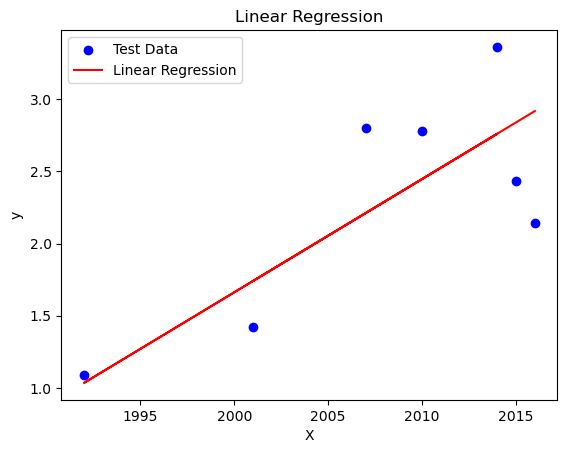

In [57]:
# Scatter plot for the test data
plt.scatter(X_test, y_test, color='blue', label='Test Data')

# Plot the regression line
plt.plot(X_test, ygas_predicted, color='red', label='Linear Regression')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()


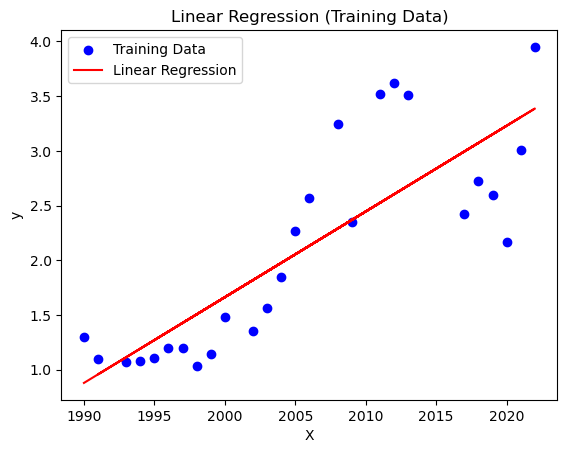

In [58]:
# Scatter plot for the training data
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# Plot the regression line
y_train_predicted = myreg_gas.predict(X_train)
plt.plot(X_train, y_train_predicted, color='red', label='Linear Regression')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression (Training Data)')
plt.legend()
plt.show()

In [59]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

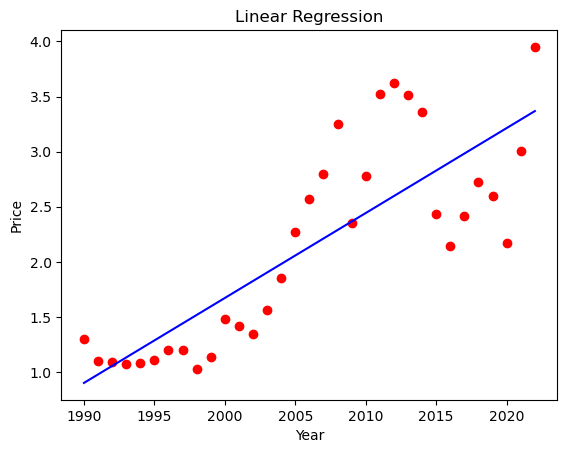

In [60]:
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Linear Regression')
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.show()
    return
viz_linear()

Now poly reg

In [61]:
poly_model = PolynomialFeatures(degree=10)
X_poly = poly_model.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [62]:
y_predict = pol_reg.predict(X_poly)

In [63]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, y_predict , color='blue')
    plt.title('Polynomia Regression')
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.show()
    return

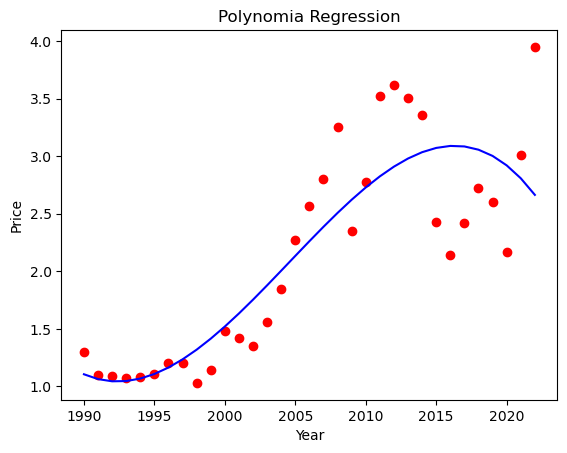

In [64]:
viz_polymonial()

In [65]:
def viz_polymonial_smooth():
    X_grid = np.arange(min(X), max(X), 0.1)
    X_grid = X_grid.reshape(len(X_grid), 1) #Why do we need to reshape? (https://www.tutorialspoint.com/numpy/numpy_reshape.htm)
    # Visualizing the Polymonial Regression results
    plt.scatter(X, y, color='red')
    plt.plot(X_grid, pol_reg.predict(poly_model.fit_transform(X_grid)), color='blue')
    plt.title('Polynomial Regression')
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.show()
    return


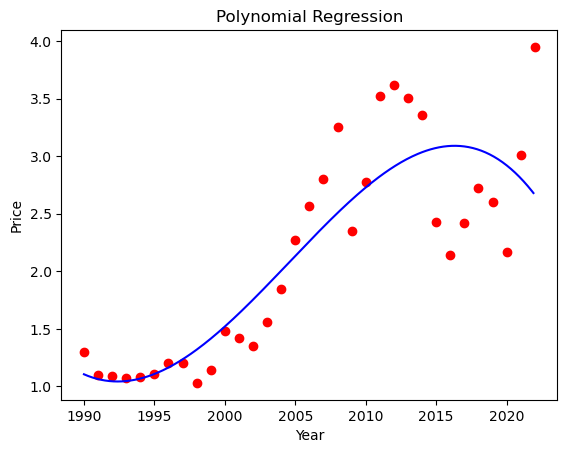

In [66]:
viz_polymonial_smooth()

In [67]:
# r2 score look much better
r2_score_poly = r2_score(y, y_predict)
print(f'R-squared (R^2) score for Polynomial Regression: {r2_score_poly:.10f}')
#0.7365489544

R-squared (R^2) score for Polynomial Regression: 0.7339647876


In [68]:
lin_reg.predict([[2032]])

array([4.13881239])

In [69]:
#R2 score for linear regression model for gas prices 
R2 = lin_reg.score(X, y)
R2

0.6646165824953191

In [70]:
pol_reg.predict(poly_model.fit_transform([[2032]]))

array([-1.02784483])

In [71]:
#Start ish data

In [72]:
lin_reg.predict([[1995]])

array([1.2870176])

In [73]:
pol_reg.predict(poly_model.fit_transform([[1995]]))

array([1.10772233])

In [74]:
#middle ish data

In [75]:
pol_reg.predict(poly_model.fit_transform([[2004]]))

array([2.00552891])

In [76]:
lin_reg.predict([[2004]])

array([1.98069742])

Even though poly reg showed better results vs linear reg, linear reg is the best fit for a real life scenario.
The reason for this, is shown below.

You should never get paid for taking a product, which would be the case if looking on forexample 2032 prediction for polyreg.

Being realistic, linear regression is going to be the best suited regression

## Putting it all together for average fuel price in dollars for communing

Now we can make an estimate of the price for fuel the average US citizen would have to pay for commuting with their own vehicle.

We set the average commuting distance to be 12,68 miles each day (mean of commuting data) MPG set to 30 Price we can predict (roughly)

In [77]:
def calc_daily_commuting_price(year):
    prediction=lin_reg.predict([[year]]) 
    prediction_value=prediction[0]
    MPG=30.0
    distance=12.68
    gallons_pr_day=distance/MPG
    daily_dollarprice_commuting_avg=gallons_pr_day*prediction_value
    return daily_dollarprice_commuting_avg

In [78]:
def calc_monthly_commuting_price(year):
    prediction=lin_reg.predict([[year]]) 
    prediction_value=prediction[0]
    MPG=30.0
    distance=12.68
    gallons_pr_day=distance/MPG
    daily_dollarprice_commuting_avg=gallons_pr_day*prediction_value*30.436875
    return daily_dollarprice_commuting_avg

In [79]:
def calc_yearly_commuting_price(year):
    prediction=lin_reg.predict([[year]]) 
    prediction_value=prediction[0]
    MPG=30.0
    distance=12.68
    gallons_pr_day=distance/MPG
    daily_dollarprice_commuting_avg=gallons_pr_day*prediction_value*365.25
    return daily_dollarprice_commuting_avg

In [80]:
calc_daily_commuting_price(2023)

1.456142702020205

In [81]:
calc_monthly_commuting_price(2023)

44.32043340355123

In [82]:
calc_yearly_commuting_price(2023)

531.8561219128799

## Train the Inflation data model

#### Split the Data in Dependent y and Independent X Data Sets

In [83]:
df_inflation.sample(5)

,date,value,year
686,2004-03-01,187.10,2004
709,2006-02-01,199.40,2006
232,1966-05-01,32.35,1966
278,1970-03-01,38.30,1970
291,1971-04-01,40.10,1971


In [84]:
# Splitting the dataset into the Training set and Test set
X_train_df_inflation, X_test_df_inflation, y_train_df_inflation, y_test_df_inflation = train_test_split(X_df_inflation, y_df_inflation, test_size=0.2, random_state=0)

In [85]:
# Fitting Linear Regression to the dataset
lin_reg_df_inflation = LinearRegression()
lin_reg_df_inflation.fit(X_df_inflation, y_df_inflation)

LinearRegression()

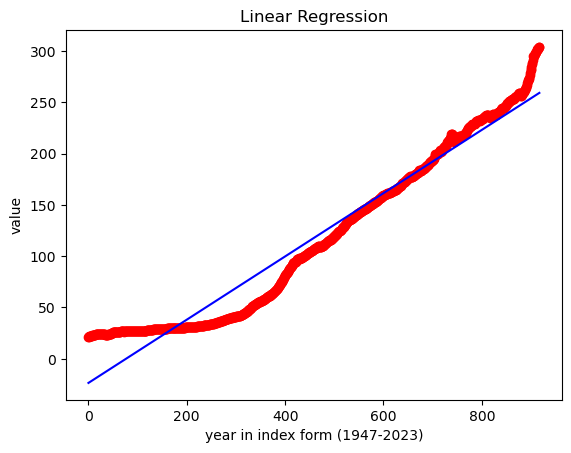

In [86]:
# Visualizing the Linear Regression results
def viz_linear_inflation():
    plt.scatter(X_df_inflation, y_df_inflation, color='red')
    plt.plot(X_df_inflation, lin_reg_df_inflation.predict(X_df_inflation), color='blue')
    plt.title('Linear Regression')
    plt.xlabel('year in index form (1947-2023)')
    plt.ylabel('value')
    plt.show()
    return
viz_linear_inflation()

In [87]:
# Fitting Polynomial Regression to the dataset

poly_model_df_inflation = PolynomialFeatures(degree=5)
X_poly_df_inflation = poly_model_df_inflation.fit_transform(X_df_inflation)
pol_reg_df_inflation = LinearRegression()
pol_reg_df_inflation.fit(X_poly_df_inflation, y_df_inflation)

LinearRegression()

In [88]:
y_predict_df_inflation = pol_reg_df_inflation.predict(X_poly_df_inflation)

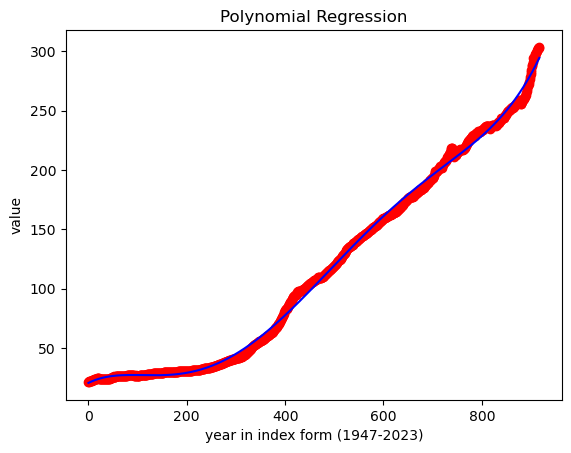

In [89]:
# Visualizing the Polymonial Regression results
def viz_polymonial_inflation():
    plt.scatter(X_df_inflation, y_df_inflation, color='red')
    plt.plot(X_df_inflation, y_predict_df_inflation , color='blue')
    plt.title('Polynomial Regression')
    plt.xlabel('year in index form (1947-2023)')
    plt.ylabel('value')
    plt.show()
    return
viz_polymonial_inflation()

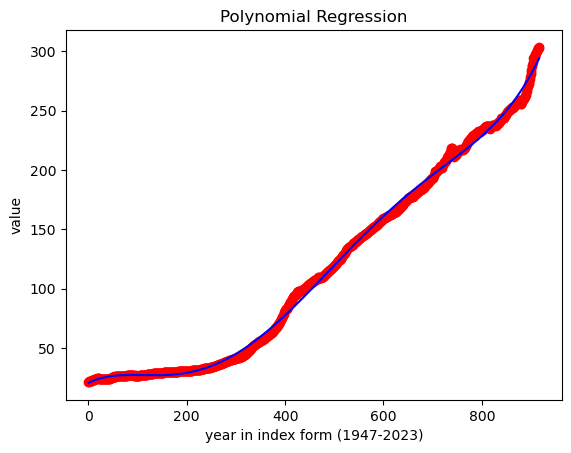

In [90]:
# Additional feature
# Making the plot line more smooth
def viz_polymonial_smooth_inflation():
    X_grid = np.arange(min(X_df_inflation), max(X_df_inflation), 0.1)
    X_grid = X_grid.reshape(len(X_grid), 1) #Why do we need to reshape? (https://www.tutorialspoint.com/numpy/numpy_reshape.htm)
    # Visualizing the Polymonial Regression results
    plt.scatter(X_df_inflation, y_df_inflation, color='red')
    plt.plot(X_grid, pol_reg_df_inflation.predict(poly_model_df_inflation.fit_transform(X_grid)), color='blue')
    plt.title('Polynomial Regression')
    plt.xlabel('year in index form (1947-2023)')
    plt.ylabel('value')
    plt.show()
    return
viz_polymonial_smooth_inflation()


In [91]:
# Predicting a new result with Linear Regression
lin_reg_df_inflation.predict([[200]])

array([[38.14823869]])

In [92]:
# Predicting a new result with Polymonial Regression
yearly_prediction_in_index_df_inflation = pol_reg_df_inflation.predict(poly_model_df_inflation.fit_transform([[996]]))
yearly_prediction_in_index_df_inflation
#output for 2030

array([[391.55193885]])

In [93]:
# Calculate R-squared score for Polynomial Regression
r2_score_poly_df_inflation = r2_score(y_df_inflation, y_predict_df_inflation)
print(f'R-squared (R^2) score for Polynomial Regression: {r2_score_poly_df_inflation:.5f}')

R-squared (R^2) score for Polynomial Regression: 0.99791


In [94]:
R2 = lin_reg_df_inflation.score(X, y)
R2

-433127.2153134635

## Stage 4: Visualisation, Explanation and Usability Evaluation
### Objective: Present the process and the results of the analysis in human-understandable form
Extend your solution with visualisation, explanation and interpretation of the results:
1. Design and develop visual representation of the data, the analysis process, the applied methods and usage
scenarios. Consider the use of animation, 3D or VR visualisation, as appropriate.
2. Create a simple visual interface of the application to make it accessible and interactive for other users.
3. Present the visualised prototype to potential users for usability evaluation. Take notes and implement the
relevant feedback outcomes. Elaborate on the benefits of applying visualisation and explanation
techniques for data analytics.

Revise, complete, and deliver the final solution to Github and a link to it in Wiseflow.

# To conclude
The predicted Percentage Growth of the US Inflation Rate (2023-2030)

In [95]:
# Create a DataFrame for years 2023.5 to 2030
years_2023_to_2030_df_inflation = np.arange(2023.5, 2031.5).reshape(-1, 1)
X_pred_df_inflation = poly_model_df_inflation.transform(years_2023_to_2030_df_inflation)
y_pred_df_inflation = pol_reg_df_inflation.predict(X_pred_df_inflation)

In [96]:
# Calculate the percentage growth
percentage_growth_df_inflation = (y_pred_df_inflation - y_pred_df_inflation[0]) / y_pred_df_inflation[0] * 10

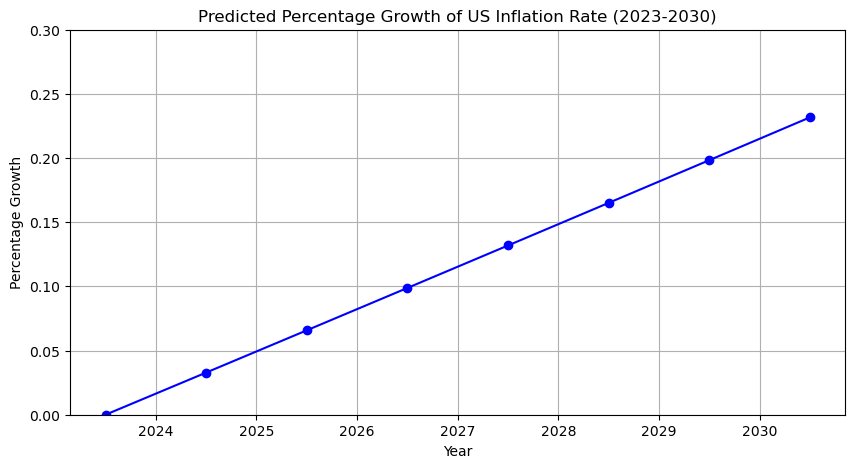

In [97]:
# Plot the predicted percentage growth
plt.figure(figsize=(10, 5))
plt.plot(np.arange(2023.5, 2031.5), percentage_growth_df_inflation, marker='o', linestyle='-', color='b')
plt.title('Predicted Percentage Growth of US Inflation Rate (2023-2030)')
plt.xlabel('Year')
plt.ylabel('Percentage Growth')
plt.ylim(0, .3)  # Set the y-axis limits from 0 to 1
plt.grid(True)
plt.show()

In [98]:
# Define the job titles and experience levels
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning Engineer']
experience_levels = ['EN', 'MI', 'SE', 'EX']

# Define the work year for which you want to make predictions
work_year_to_predict = 2030  # Replace with the desired work year

# Call the function to make predictions
predicted_salaries = predict_salaries_for_all_combinations(trained_models, job_titles, experience_levels, work_year_to_predict)

# Print the predicted salaries and percentage differences
for job_title in job_titles:
    for experience_level in experience_levels:
        predicted_salary, percentage_difference = predicted_salaries[job_title][experience_level]
        if predicted_salary is not None:
            print(f'Predicted salary for {job_title} ({experience_level}) in {work_year_to_predict}: {predicted_salary:.2f} USD')
            print(f'Percentage difference from 2023: {percentage_difference:.2f}%')
        else:
            print(f'Insufficient data for {job_title} ({experience_level}).')



Predicted salary for Data Scientist (EN) in 2030: 193892.16 USD
Percentage difference from 2023: 62.98%
Predicted salary for Data Scientist (MI) in 2030: 178042.10 USD
Percentage difference from 2023: 32.72%
Predicted salary for Data Scientist (SE) in 2030: 216382.57 USD
Percentage difference from 2023: 29.25%
Predicted salary for Data Scientist (EX) in 2030: 510000.00 USD
Percentage difference from 2023: 187.32%
Predicted salary for Data Engineer (EN) in 2030: -67060.09 USD
Percentage difference from 2023: -165.44%
Predicted salary for Data Engineer (MI) in 2030: 116842.11 USD
Percentage difference from 2023: -5.71%
Predicted salary for Data Engineer (SE) in 2030: 188901.20 USD
Percentage difference from 2023: 18.92%
Predicted salary for Data Engineer (EX) in 2030: 42398.95 USD
Percentage difference from 2023: -78.93%
Predicted salary for Data Analyst (EN) in 2030: 74768.36 USD
Percentage difference from 2023: 2.48%
Predicted salary for Data Analyst (MI) in 2030: 125986.45 USD
Percent

/Users/emiliocastrolagunas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/emiliocastrolagunas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/emiliocastrolagunas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/emiliocastrolagunas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/emiliocastrolagunas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with featur